<h1 style="text-align:center">Title</h3>

<h1 style="text-align:center">Introduction</h1>

Understanding the factors that influence the color of Vinho Verde wine, which is type of Portugese wine, is essential for enhancing the quality control and production processes in the wine industry. In this study, we aim to investigate whether it is feasible to predict the color of Vinho Verde wine using specific physicochemical variables. Analyzing these relationships can provide valuable insights for winemakers to optimize production techniques and maintain consistent product quality. We will be utilizing [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) datasets, containing information on physicochemical properties and color attributes of Vinho Verde wines. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine which has the following variables: fixed acidity (concentration of non-volatile acids in the wine), volatile acidity (concentration of volatile acids), citric acid concentration (in $g/dm^3$ ), residual sugar content  (g/dm³), chloride content (in g/dm³), free sulfur dioxide (in mg/dm³), total sulfur dioxide (in $mg/cm^3$), density (in $g/cm^3$),  pH, sulfate content (in $g/dm^3$), alcohol content (as a vol percentage), quality (as a scale from 1-5 representing excellence). This study seeks to answer the following question: <b>Can we accurately predict the color of Vinho Verde wine as either red or white using selected physiochemical variables that are added to the wine mixture to alter the sensory and antioxidant properties of the wine?</b>


<h1 style="text-align:center">Methods & Results</h1><!--  -->


First, we have downloaded the dataset from the website and then we accessed it using github by cleaking on 'raw' to get the urls which we named `url1` and `url2`. Both are used to load the data from the web so that it will be repeatable as the github repository we are using is public. In order to wrangle and clean the data into a usable format,we have also renamed the columns and added categories for color by using `$`. To make a efficient and understandable model, we concentrated on certain pertinent characteristics of the wine in the dataset. Then, we use the function `write_csv2` in order to form a dataset consisting of predictor variables we have chosen and also with the  categorical variable which is color. The dataframe is called `combined_wine2`. As we continue with exploratory data analysis, we have created a training set and a testing set called `wine_train` and `wine_test` respectively to train and evaluate the KNN classifier. This allows us to assess the model's generalization performance to fresh data.

In [ ]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(dplyr)
library(tidyclust)
library(rsample)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.8
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::dis

In [2]:
url1<-"https://raw.githubusercontent.com/zaladmander/DSCI100-Group-Project/main/data/winequality-red.csv"
ur12<- "https://raw.githubusercontent.com/zaladmander/DSCI100-Group-Project/main/data/winequality-white.csv"

red_wine<-read_delim(file=url1,delim=";")|>
        rename(fixed_acidity = `fixed acidity`,
               volatile_acidity = `volatile acidity`,
               citric_acid = `citric acid`,
               residual_sugar = `residual sugar`,
               free_SO2 = `free sulfur dioxide`,
               total_SO2 = `total sulfur dioxide`)

white_wine<-read_delim(file="data/winequality-white.csv",delim=";")|>
        rename(fixed_acidity = `fixed acidity`,
               volatile_acidity = `volatile acidity`,
               citric_acid = `citric acid`,
               residual_sugar = `residual sugar`,
               free_SO2 = `free sulfur dioxide`,
               total_SO2 = `total sulfur dioxide`)
red_wine$color<- "red" # adds  category with $
white_wine$color <- "white" # adds category with $
combined_wine<-bind_rows(red_wine,white_wine)
write_csv2(combined_wine,"combined_wine.csv")

combined_wine2<-combined_wine|>
                select(free_SO2, chlorides, residual_sugar,citric_acid,color)

# Uncomment to look at the df
# red_wine
# white_wine
combined_wine2 # combined df for red wine and white wine

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


free_SO2,chlorides,residual_sugar,citric_acid,color
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11,0.076,1.9,0.00,red
25,0.098,2.6,0.00,red
15,0.092,2.3,0.04,red
⋮,⋮,⋮,⋮,⋮
30,0.041,1.2,0.19,white
20,0.022,1.1,0.30,white
22,0.020,0.8,0.38,white


In [3]:
set.seed(2024)
wine_split<-initial_split(data=combined_wine2, prop=0.75, strata=color)
wine_train<-training(wine_split)

glimpse(wine_train)
summary(wine_train)

Rows: 4,872
Columns: 5
$ free_SO2       <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 16, 9, 51, 6, 17…
$ chlorides      <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069, 0.065,…
$ residual_sugar <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1, 1.6, …
$ citric_acid    <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, 0.02, 0…
$ color          <chr> "red", "red", "red", "red", "red", "red", "red", "red",…


    free_SO2        chlorides       residual_sugar    citric_acid    
 Min.   :  1.00   Min.   :0.00900   Min.   : 0.600   Min.   :0.0000  
 1st Qu.: 17.00   1st Qu.:0.03800   1st Qu.: 1.800   1st Qu.:0.2500  
 Median : 29.00   Median :0.04700   Median : 3.000   Median :0.3100  
 Mean   : 30.51   Mean   :0.05617   Mean   : 5.395   Mean   :0.3186  
 3rd Qu.: 41.00   3rd Qu.:0.06500   3rd Qu.: 8.000   3rd Qu.:0.4000  
 Max.   :289.00   Max.   :0.61100   Max.   :65.800   Max.   :1.2300  
    color          
 Length:4872       
 Class :character  
 Mode  :character  
                   
                   
                   

In [4]:
wine_test <- testing(wine_split)
glimpse(wine_test)
summary(wine_test)

Rows: 1,625
Columns: 5
$ free_SO2       <dbl> 15, 17, 52, 35, 16, 10, 11, 7, 12, 9, 5, 12, 8, 6, 20, …
$ chlorides      <dbl> 0.097, 0.071, 0.176, 0.092, 0.368, 0.106, 0.080, 0.172,…
$ residual_sugar <dbl> 1.8, 6.1, 3.8, 1.8, 1.7, 1.6, 1.4, 1.5, 5.9, 2.2, 1.8, …
$ citric_acid    <dbl> 0.08, 0.36, 0.18, 0.56, 0.28, 0.21, 0.16, 0.09, 0.36, 0…
$ color          <chr> "red", "red", "red", "red", "red", "red", "red", "red",…


    free_SO2        chlorides       residual_sugar    citric_acid    
 Min.   :  1.00   Min.   :0.01200   Min.   : 0.700   Min.   :0.0000  
 1st Qu.: 17.00   1st Qu.:0.03700   1st Qu.: 1.800   1st Qu.:0.2400  
 Median : 29.00   Median :0.04700   Median : 3.200   Median :0.3100  
 Mean   : 30.57   Mean   :0.05563   Mean   : 5.589   Mean   :0.3186  
 3rd Qu.: 41.00   3rd Qu.:0.06500   3rd Qu.: 8.600   3rd Qu.:0.3900  
 Max.   :138.50   Max.   :0.46400   Max.   :31.600   Max.   :1.6600  
    color          
 Length:1625       
 Class :character  
 Mode  :character  
                   
                   
                   

<<<<<<< local


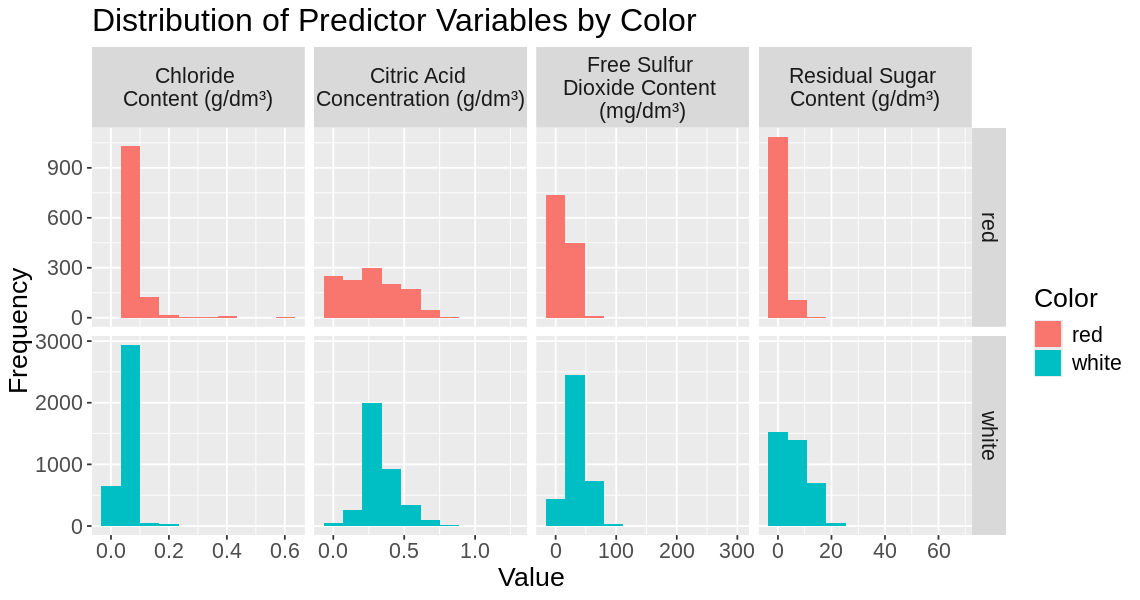

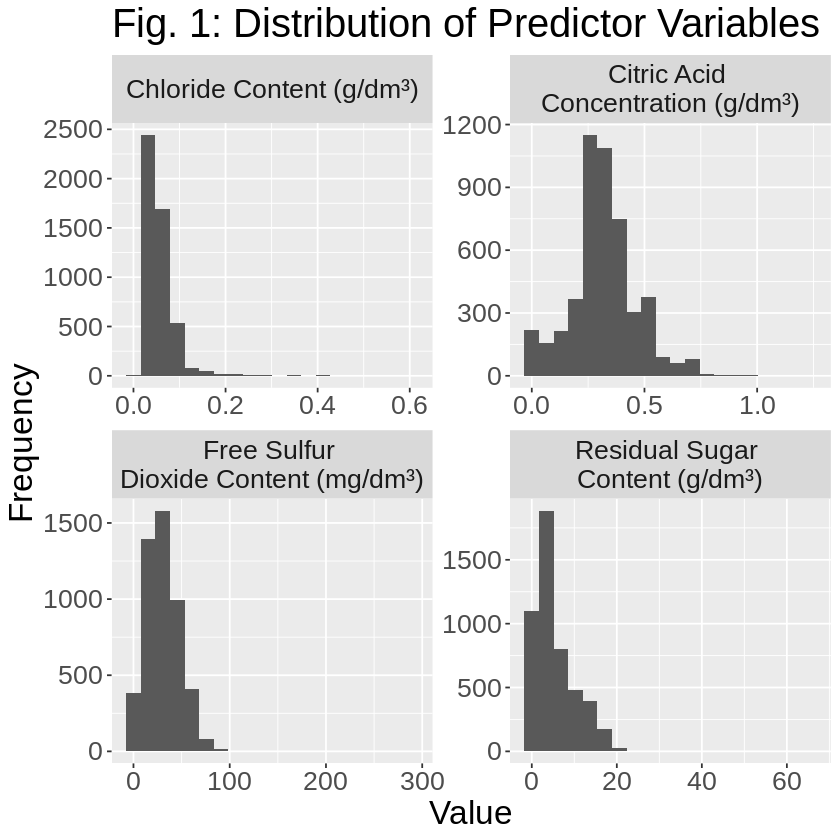

>>>>>>> remote


In [5]:
train_data_long<-wine_train|>
                pivot_longer(cols=free_SO2:citric_acid, names_to = "variable",values_to = "value")

variable_labels<-c(free_SO2 ="Free Sulfur \nDioxide Content \n(mg/dm³)",
                  chlorides = "Chloride \nContent (g/dm³)",
                  residual_sugar = "Residual Sugar \nContent (g/dm³)",
                   citric_acid = "Citric Acid \nConcentration (g/dm³)")

options(repr.plot.width=9.5,repr.plot.height=5)
plot1 <- train_data_long |> 
  ggplot(aes(x = value)) +
  geom_histogram(bins = 10, position = "identity", aes(fill = color)) +
  facet_grid(color ~ variable, scales = "free", labeller = labeller(variable = variable_labels)) +
  labs(x = "Value", y = "Frequency", fill = "Color") +
  ggtitle("Distribution of Predictor Variables by Color") +
  theme(text = element_text(size = 16))


plot1

In [ ]:
set.seed(2024) 

wine_recipe <- recipe(color ~ free_SO2 + chlorides + residual_sugar + citric_acid, data = wine_train) |>
               step_scale(all_predictors()) |>
               step_center(all_predictors())


vfold <- vfold_cv(wine_train, v = 5, strata = color)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1,to = 100,by = 5))

knn_results <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |> 
       filter(.metric == "accuracy")
accuracies

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 6)

cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Cross-validation Accuracy vs Number of Neighbors")
cross_val_plot

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

<h1 style="text-align:center">Discussion</h1>

<h1 style="text-align:center">References</h1>